<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Исходные данне**

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**

Установить параметры определения рыночной стоимости объектов недвижимости. 
Результаты исследования будут использованы при построении автоматизированной системы для отслеживания аномалий и мошеннической деятельности.

**Ход исследования**
1. Обзор данных, переданных банком.
2. Предобработка данных.
3. Исследовательский анализ данных.

## Изучение данных из файла

Выполним первичный обзор данных

In [2]:
#импортируем библиотеки pandas и numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#прочитаем файл с данными и сохраним в переменное df для локальной и сетевой работы
try:
    df = pd.read_csv('real_estate_data.csv')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [5]:
#данные выведены в одну строку, т.к. разделителем является табуляция, а не `,`.
#заменем разделитель при чтении файла
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
with pd.option_context('display.max_columns', None):
    display(df.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным, названия колонок отражают следующую информацию:


* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

На основании обзора данных установлено:

Всего в таблице 23699 сторок и 22 колонки.
1. Названия колонок `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` не соответствуют стилю.
2. Присутствуют данные типов: int, float, object, bool. 
    * Значения в столбцах `floors_total`, `parks_around3000`, `ponds_around3000` и `balcony` стоит заменить на int, т.к. количество этажей, балконов, парков и т.п. не можнт быть дробным, а изменение типа данных поможет сэкономить память.
    * В столбце `is_apartment` большая часть значений - пропуски. Оставшиеся данные имеют булев тип. Имеет смысл изменить тип даннх на bool.
    * Значения в столбце `first_day_exposition` необходимо перевести в date.
    * Значения в столбцах `last_price`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` имеют тип float, но не имеют дробной части. Их можно перевести в int. 
3. В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` встречаются пропуски, их необходимо обработать.

На первый взгляд данных достаточно для определения параметров рыночной стоимости объектов недвижимости. На их основе мы сможем рассчитать стоимость одного кв.м. и другие параметры.

И всё же в исходных данных присутствует большое количество пропусков, нескольно заголовков колонок нужно изменить, часть типов данных необходимо переобразовать, а также проверить данные на аномалии и дубликаты.

Устраним проблемы в данных, прежде чем продолжить исследование.

## Предобработка данных

На меобходимо:
* Преименовать столбцы.
* Обработать пропуски.
* Проверить аномалии и дубликаты.
* Изменить типы данных.

In [8]:
#переименуем столбцы
df = df.rename(
    columns = {'cityCenters_nearest': 'city_centers_nearest', 
               'parks_around3000': 'parks_around_3000', 
               'ponds_around3000': 'ponds_around_3000'})

#проверим результат
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
#посмотрим на пропуски и их количесто в столбцах
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Необходимо отметить следующее:
* В калонках `parks_around_3000` и `ponds_around_3000` пропусков меньше, чем в `parks_nearest` и  `ponds_nearest`. Данные в столбцах `parks_around_3000` и `ponds_around_3000` заполняли собственники, а `parks_nearest` и  `ponds_nearest` расчитывались на основе картографических данных. Поэтому строки, где заполнены `parks_around_3000` и `ponds_around_3000`, но отсутствуют данные в `parks_nearest` и  `ponds_nearest` могут вызывать подозрения и должны быть дополнительно проверены.
* Почти 10% строк содержат пропуск в строке `is_apartment`. При продаже собственник может заведомо утаивать эту информацию, т.к. апартаменты стоят значительно дешевле. Удалять пропуски в этом столбце нельзя. В идеале информацию о каждом доме с пропуском необходимо проверить в реестре или другой базе данных.
* Информацию о количестве этажей в доме восстановить по текущим данным также не удастся. Ее тоже можно было бы подтянуть из реестра по адресу дома (у нас полный адрес также отсутсвует). Поскольку пропусков в этаже квартир нет, можем предположить, что часть собственников намерено не указали этажность дома, если квартира находится на последнем этаже. Побно выполнить Обзор данных, чтобы проверить гипотезу.
* Пропуски в `kitchen_area`, `ceiling_height`, `living_area`, `days_exposition`, `locality_name` восстановить не удастся. Строки с пропусками `locality_name` стоит изучить дополнительно, если там много пропусков по другим столбцам - удалить из выборки.
* Расстояние до аэропорта и центра города восстановить также не удастся без точного адреса.
* В столбцах `parks_around_3000`, `ponds_around_3000`, `airports_nearest` и `city_centers_nearest` примерно одинаковое количество пропустков. Стоит взглянуть на эти данные дополнительно. Возможно есть общая причина.
* Для `balcony` предпологаем, что если количество балконов не указано, они отсутствуют, поэтому заменим пропуски на 0.

In [10]:
#смотрим выбору, где отсутствует расстояние до парков, но указано их количесво в радиусе 3 км.
df[(df['parks_nearest'].isna()) & (~df['parks_around_3000'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
14,1,4400000.0,36.0,2016-06-23T00:00:00,1,NaN,6.0,17.0,1,NaN,...,8.0,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.0,2016-09-09T00:00:00,1,NaN,17.0,16.5,7,NaN,...,11.0,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.0,11,NaN,...,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,...,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0


In [11]:
#смотрим выбору, где отсутствует расстояние до водоема, но указано их количесво в радиусе 3 км.
df[(df['ponds_nearest'].isna()) & (~df['ponds_around_3000'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,NaN,...,9.0,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
18,8,3250000.0,31.0,2017-01-27T00:00:00,1,2.50,5.0,19.4,2,NaN,...,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.0,11,NaN,...,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
21,13,3200000.0,31.6,2018-03-14T00:00:00,1,NaN,5.0,16.9,2,NaN,...,5.7,1.0,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0


Теперь стало ясно. В сторках, где стоят пропуски в расстоянии до парка или водоема, их просто нет поблизости.

In [12]:
#смотрим выбору, где отсутствует этажность дома.
df[df['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Связи ни с этажом квартиры, ни с каим-либо другим значимым фактором не найдено. Единственное, что просается в глаза, если не заполнена этажность дома, отсутсвуют данные о высоте потолков. Однако данная информация нам пока ничем не помогает.

In [13]:
#смотрим выбору, где отсутствует название населенного пункта.
df[df['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пропусков в других столбцах не больше, чем в общей выборке. Можно предположить, что недвижимость находится в пригородах облосных поселений, поэтому название не указано. Удалять строки нельзя. Заменить пропуски также не удастся.

In [14]:
#посмотрим пересечения пропусков в `parks_around_3000`, `ponds_around_3000`, `airports_nearest` и `city_centers_nearest`
df[(df['parks_around_3000'].isna()) & (df['ponds_around_3000'].isna()) & (df['airports_nearest'].isna()) & (df['city_centers_nearest'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [15]:
#количество пересечений пропусков в `parks_around_3000`, `ponds_around_3000`, `airports_nearest` и `city_centers_nearest`
len(df[(df['parks_around_3000'].isna()) & (df['ponds_around_3000'].isna()) & (df['airports_nearest'].isna()) & (df['city_centers_nearest'].isna())])

5518

Число пересечений максимально для данной выборки. Однако каких-либо аномалий, ставших причиной пропусков, в других столбцах не обнаружено. Возможно проблема связана с координатами, использованными для расчетов расстояний, но в нашей таблице эти данные отсутствуют.

In [16]:
#для `balcony` заменим пропуски на 0
df['balcony'] = df['balcony'].fillna(0)

#проверим результат
df['balcony'].isna().sum()

0

Теперь необходимо проверить данные на дублекаты и аномалии.

In [17]:
#проверим данные на предмет анамальных значений
for column in df.columns:
    print(f'Список значений в столбце {column}:')
    print(df[column].value_counts())

Список значений в столбце total_images:
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
Список значений в столбце last_price:
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64
Список значений в столбце total_area:
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtyp

In [18]:
#проверим числовые данные на отрицательные значения
df_columns_num = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 
                  'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000',
                  'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']
for column in df_columns_num:
    for i in range(0, df.shape[0]-1):
        try:
            if float(df.loc[i, column]) < 0: #приводим к float перед сравнением, т.к. если этого не сделать некоторые 0 распознаются как str
                print(f'Строка содержит значение < 0 {df[i]} в колонке {column}')
        except:
            print(f'ОШИБКА в колонке {column}, строке {df.loc[i]}')
            break

Отрицательных значений не обнаружено.

Проверим наличие дубликатов.

In [19]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Было бы правильно изменить типы данных.
* `floors_total`, `parks_around_3000`, `ponds_around_3000` и `balcony` на int
* `is_apartment` на bool.
* `first_day_exposition` на date.
* `last_price`, `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` в int.

Однако необходимо отметить, что в столбцах много пропусков - NaN. NaN имеет тип float. Его изменение может привести к ошибкам.

In [20]:
#пример
df['is_apartment'].astype(bool).head()

0    True
1    True
2    True
3    True
4    True
Name: is_apartment, dtype: bool

Пропуски отсутсвуют только в `last_price` и `first_day_exposition`. Изменим типы только для них.

In [21]:
#преобразуем 'last_price' в uint32 для сокращения занимаемой памяти
df['last_price'] = np.uint32(df['last_price'])

In [22]:
#преобразуем 'first_day_exposition' в date для удобства работы
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  uint32        
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


На данном этапе предобработка исходных данных завершена.

## Расчёты и добавление результатов в таблицу

Для дальнейшего исследования нам необходимо рассчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
#добавим столбец price_to_msq - цена за кв. м
df.insert(3, 'price_to_msq', 0)
df['price_to_msq'] = round((df['last_price'] / df['total_area']), 2)

In [25]:
#добавим день недели - day_of_week_exposition, месяц - month_exposition и год - year_exposition публикации объявления
df.insert(5, 'day_of_week_exposition', df['first_day_exposition'].dt.dayofweek)
df.insert(6, 'month_exposition', pd.DatetimeIndex(df['first_day_exposition']).month)
df.insert(7, 'year_exposition', pd.DatetimeIndex(df['first_day_exposition']).year)

In [26]:
#добавим столбец с категорией этажа floor_categoty - первый, последний, другой
#функция для категоризации
def floor_categoty_funk(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
#применение функции к таблице
df.insert(11, 'floor_categoty', df.apply(floor_categoty_funk, axis=1))

In [27]:
#добавим столбцы с соотношением жилой и общей площади - living_to_total_area, 
#и отношением площади кухни к общей - kitchen_to_total_area
df['living_to_total_area'] = round((df['living_area'] / df['total_area']), 2)
df['kitchen_to_total_area'] = round((df['kitchen_area'] / df['total_area']), 2)

In [28]:
#проверим конечный результат
with pd.option_context('display.max_columns', None):
    display(df.head())

,total_images,last_price,total_area,price_to_msq,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,floors_total,floor_categoty,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,120370.37,2019-03-07,3,3,2019,3,2.70,16.0,другой,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23
1,7,3350000,40.4,82920.79,2018-12-04,1,12,2018,1,NaN,11.0,первый,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.46,0.27
2,10,5196000,56.0,92785.71,2015-08-20,3,8,2015,2,NaN,5.0,другой,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15
3,0,64900000,159.0,408176.10,2015-07-24,4,7,2015,3,NaN,14.0,другой,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000,100.0,100000.00,2018-06-19,1,6,2018,2,3.03,14.0,другой,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41


Все столбцы успешно добавлены.

## Исследовательский анализ данных

**Изучим следующие параметры:** 
* площадь;
* цена;
* число комнат;
* высота потолков. 

Построим гистограммы для каждого параметра.

В пункте 471 мы уже рассматривали список возможных значений для каждого из этих параметров и их частотное распределение.
Теперь мы визуализируем распределения.

In [29]:
#посмотрим описание данных столбца total_area
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

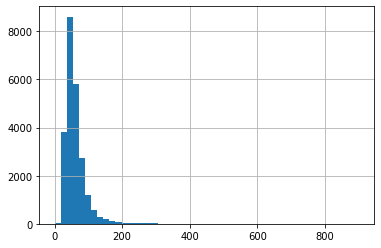

In [30]:
#постоим гистограмму распределения значений площади
df['total_area'].hist(bins=50, range=(0, 900))

Имеем распределение Пуассона. В правой части значения свыше 300 практически отсутсвуют.

Увеличим масштаб, отрезав 'хвост'.

<AxesSubplot:>

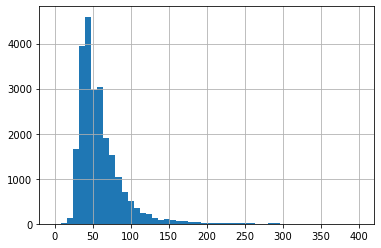

In [31]:
df['total_area'].hist(bins=50, range=(0, 400))

Визуально имеем небольшое количество значений от 12 до 25 кв.м и свыше 200. Основной объем недвижисости приходится на площади 25 - 150 кв.м.

In [32]:
print(f"Значений больше 250 в выборке:{df[df['total_area'] > 250]['total_area'].count() / df['total_area'].count():.2%}")

Значений больше 250 в выборке:0.47%


Значения больше 250 можно отбросить.

In [33]:
#посмотрим описание данных столбца last_price
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

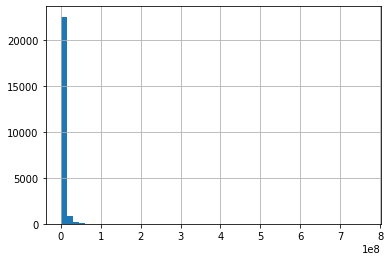

In [34]:
#постоим гистограмму распределения значений цены
df['last_price'].hist(bins=50, range=(0, 7.630000e+08))

Имеем распределение Пуассона. В правой части значений свыше 7e07 практически не видно.

Увеличим масштаб, отрезав 'хвост'.

<AxesSubplot:>

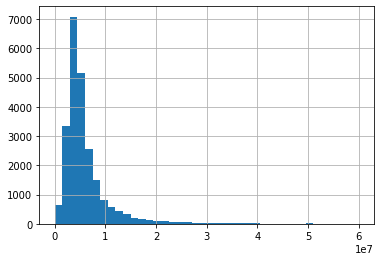

In [35]:
df['last_price'].hist(bins=40, range=(0, 6.e+07))

Предложения дороже 20 млн. встречаются редко. Свыше 52 млн. совсем не видны. Посмотрим левую часть ещё более детально.

<AxesSubplot:>

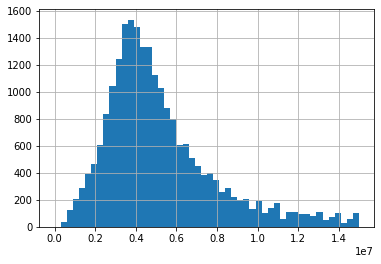

In [36]:
df['last_price'].hist(bins=50, range=(0, 1.5e+07))

Основное количество предложений приходится на суммы от 1 до 10 млн. Предложений меньше 450 тысяч и больше 52 млн. практически нет.

In [37]:
print(f"Значений больше 52 млн в выборке:{df[df['last_price'] > 5.2e7]['last_price'].count() / df['last_price'].count():.2%}")
print(f"Значений меньше 450 тыс в выборке:{df[df['last_price'] < 4.5e5]['last_price'].count() / df['last_price'].count():.2%}")

Значений больше 52 млн в выборке:0.53%
Значений меньше 450 тыс в выборке:0.02%


Значения ниже 450 тысяч и больше 66 млн. можно отбросить.

In [38]:
#посмотрим описание данных столбца last_price
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

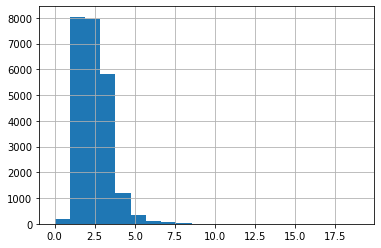

In [39]:
#постоим гистограмму распределения количества комнат
df['rooms'].hist(bins=20, range=(0, 19))

Распределение Пуассона. В правой части значения свыше 8 практически отсутсвуют.

Увеличим масштаб, отрезав 'хвост'.

<AxesSubplot:>

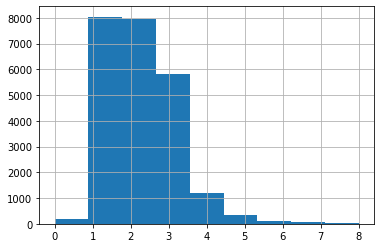

In [40]:
#постоим гистограмму распределения количества комнат
df['rooms'].hist(bins=9, range=(0, 8))

Есть предложения с 0 комнат. Это могут быть студии или проблемы в данных. Необходимо взглянуть.

In [41]:
with pd.option_context('display.max_columns', None):    
    display(df.query('rooms == 0').head(10))

,total_images,last_price,total_area,price_to_msq,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,floors_total,floor_categoty,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
144,1,2450000,27.00,90740.74,2017-03-30,3,3,2017,0,NaN,24.0,другой,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0.57,NaN
349,4,2320000,25.00,92800.00,2017-09-27,2,9,2017,0,NaN,14.0,первый,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.68,NaN
440,8,2480000,27.11,91479.16,2018-03-12,0,3,2018,0,NaN,17.0,другой,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,0.91,NaN
508,0,3375000,34.40,98110.47,2017-03-28,1,3,2017,0,NaN,26.0,другой,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,0.71,NaN
608,2,1850000,25.00,74000.00,2019-02-20,2,2,2019,0,NaN,10.0,другой,NaN,7,NaN,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN
697,12,2500000,24.10,103734.44,2017-12-01,4,12,2017,0,2.75,25.0,другой,17.50,21,NaN,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,0.73,NaN
716,5,1500000,17.00,88235.29,2017-06-07,2,6,2017,0,2.70,9.0,первый,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,0.71,NaN
780,9,2600000,26.10,99616.86,2018-02-20,1,2,2018,0,NaN,18.0,другой,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN
839,14,1900000,35.00,54285.71,2017-04-14,4,4,2017,0,2.70,5.0,другой,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.43,NaN
946,5,2200000,23.00,95652.17,2016-09-27,1,9,2016,0,NaN,27.0,другой,18.00,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,0.78,NaN


Так и есть, это либо студии, либо квартиры с открытой планировкой.

Наибольшее количество предложений приходится на диапазон 1-3 комнаты. Предложений больше 6 мало. Свыше 8 комнат практически нет.

In [42]:
print(f"Значений больше 6 в выборке:{df[df['rooms'] > 6]['rooms'].count() / df['rooms'].count():.2%}")

Значений больше 6 в выборке:0.38%


Предложения свыше 6 комнат можем отбросить.

In [43]:
#посмотрим описание данных столбца ceiling_height
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

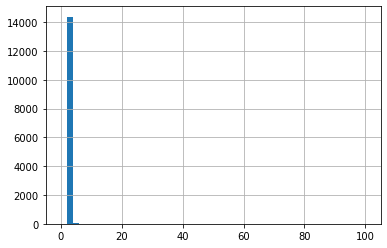

In [44]:
#постоим гистограмму распределения значений высоты потолков
df['ceiling_height'].hist(bins=50, range=(0, 100))

Высота потолков в 1 и 100 метров выглядит аномально. Посмотрим строки.

In [45]:
with pd.option_context('display.max_columns', None):    
    display(df.query('(ceiling_height < 1.7 ) or (ceiling_height > 5)'))

,total_images,last_price,total_area,price_to_msq,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,floors_total,floor_categoty,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
355,17,3600000,55.2,65217.39,2018-07-12,3,7,2018,2,25.0,5.0,другой,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,0.58,NaN
464,15,66571000,280.3,237499.11,2015-06-11,3,6,2015,6,5.2,8.0,другой,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,0.57,0.08
1026,20,155000000,310.0,500000.00,2018-10-12,4,10,2018,5,5.3,3.0,последний,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,0.61,0.20
1388,20,59800000,399.0,149874.69,2015-01-21,2,1,2015,5,5.6,6.0,последний,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,NaN,NaN
3148,14,2900000,75.0,38666.67,2018-11-12,0,11,2018,3,32.0,3.0,другой,53.0,2,NaN,False,False,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.71,0.11
3474,3,1400000,30.0,46666.67,2018-03-16,4,3,2018,1,8.0,5.0,другой,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,0.51,0.24
4643,0,4300000,45.0,95555.56,2018-02-01,3,2,2018,2,25.0,9.0,другой,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,0.67,0.16
4876,7,3000000,25.0,120000.00,2017-09-27,2,9,2017,0,27.0,25.0,другой,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.68,NaN
5076,0,3850000,30.5,126229.51,2018-10-03,2,10,2018,1,24.0,5.0,первый,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,0.64,0.18
5246,0,2500000,54.0,46296.30,2017-10-13,4,10,2017,2,27.0,5.0,другой,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,0.56,0.17


Строки 22869 (100 м - потолок, 5 балконов, 25 общая площадь, нет фото), 22590 (1 м - потолок, 55 общая, ) выглядят неправдоподобно. 
В 22336, 355, 22938 значения высоты потолка похжи на опечатки.

Удалять их пока не будем. Увеличим масштаб гистограммы.

<AxesSubplot:>

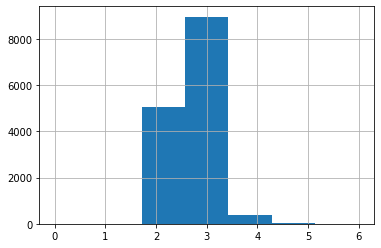

In [46]:
df['ceiling_height'].hist(bins=7, range=(0, 6))

Большая часть значений приходится на диапазон 2.5 - 3.5 метра. Больше 5.2 и меньше 1.7 практически отсутствует. Однако по таблице видно, что есть помещения с более высокими потолками (возможно, коммерческие помещения).

In [47]:
print(f"Значений от 6 в выборке:{df[df['ceiling_height'] > 6]['ceiling_height'].count() / df['ceiling_height'].count():.2%}")
print(f"Значений меньше 1.7 в выборке:{df[df['ceiling_height'] < 1.7]['ceiling_height'].count() / df['ceiling_height'].count():.2%}")

Значений от 6 в выборке:0.20%
Значений меньше 1.7 в выборке:0.01%


Знчения меньше 1.7 (ниже просто человек не пройдет) и больше 6 м можем отбросить.

Изучим время продажи квартиры:
1. Построим гистограмму. 
2. Посчитаем среднее и медиану. 
3. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

In [48]:
#посмотрим описание данных столбца days_exposition
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 180.89, медиана - 95. Очевидно, есть объявления с крайне высокими значениями, которые увеличивают среднее в 2 раза. Максимальное время продажи 1580 дней - более 4 лет.

<AxesSubplot:>

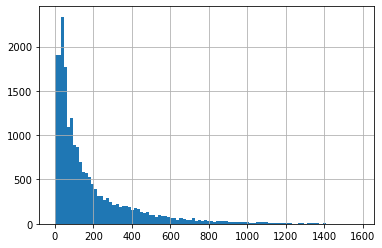

In [49]:
#постоим гистограмму распределения времени продажи
df['days_exposition'].hist(bins=100, range=(0, 1580))

Имеем распределение Пуассона. Большая часть объявлений провисела не более 250 дней. Более 1100 совсем мало объявлений.

Посмотрим левую часть, отбросив 'хвост'.

<AxesSubplot:>

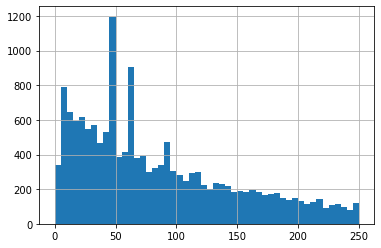

In [50]:
df['days_exposition'].hist(bins=50, range=(0, 250))

Видим порядка 370 объявлений провисевших всего несколько дней. Наиболее часто объявления висят не более 2 месяцев.

Согласно данным describe() межквартильный размах - от 45 до 232 дней.
Построим диаграмму размаха.

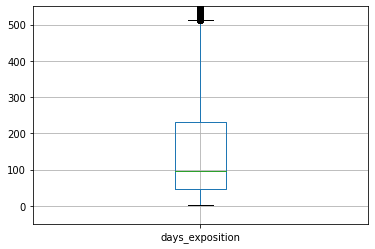

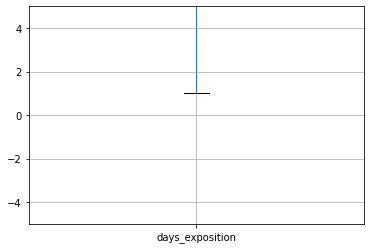

In [51]:
df.boxplot(column=['days_exposition'])
plt.ylim(-50, 550)
plt.show()
df.boxplot(column=['days_exposition'])
plt.ylim(-5, 5)
plt.show()

Значения свыше 510 дней являются нетипично долгими. Нижняя граница размаха находится на уровне 1 дня.
Обычно же продажа занимает от 45 до 232 дней.

In [52]:
print(f"Значений больше 1000 в выборке:{df[df['days_exposition'] > 1000]['days_exposition'].count() / df['days_exposition'].count():.2%}")

Значений больше 1000 в выборке:1.35%


Несмотря на относительно высокий процент, знчения больше 1000 дней можем отбросить. Они могут быть устаревшими.

**Уберем редкие и выбивающиеся значения, обнаруженные выше.**

Создадим таблицу df_clean, где:
* Время продажи до 1000 дней.
* Высота потолков от 1.7 до 6 метров.
* Комнат не более 6.
* Цена от 0.45 до 25 млн.
* Площадь до 250 кв.м.

In [53]:
df_clean = df.query('((3 <= days_exposition <= 1000) | days_exposition.isnull()) & ((1.7 <= ceiling_height <= 6) | ceiling_height.isnull()) & (rooms <= 6 | rooms.isnull()) & ((4.5e5 <= last_price <= 5.2e7) | last_price.isnull()) & (total_area <= 250 | total_area.isnull())')
display(df_clean.head())
df_clean.info()

,total_images,last_price,total_area,price_to_msq,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,120370.37,2019-03-07,3,3,2019,3,2.70,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23
1,7,3350000,40.4,82920.79,2018-12-04,1,12,2018,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.46,0.27
2,10,5196000,56.0,92785.71,2015-08-20,3,8,2015,2,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15
4,2,10000000,100.0,100000.00,2018-06-19,1,6,2018,2,3.03,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41
5,10,2890000,30.4,95065.79,2018-09-10,0,9,2018,1,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.47,0.30


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23157 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23157 non-null  int64         
 1   last_price              23157 non-null  uint32        
 2   total_area              23157 non-null  float64       
 3   price_to_msq            23157 non-null  float64       
 4   first_day_exposition    23157 non-null  datetime64[ns]
 5   day_of_week_exposition  23157 non-null  int64         
 6   month_exposition        23157 non-null  int64         
 7   year_exposition         23157 non-null  int64         
 8   rooms                   23157 non-null  int64         
 9   ceiling_height          14132 non-null  float64       
 10  floors_total            23074 non-null  float64       
 11  floor_categoty          23157 non-null  object        
 12  living_area             21307 non-null  float6

В таблице осталось 23 157 строк.
Дальнейшее исследование будем проводить по этим данным.

**Определим факторы больше всего влияющие на стоимость квартиры. Изучим зависимость цены от:**

* Площади, числа комнат, удалённости от центра. 
* Того, на каком этаже расположена квартира: первом, последнем или другом. 
* Даты размещения: дня недели, месяца и года.

,last_price,rooms,total_area,city_centers_nearest
last_price,1.000000,0.474493,0.770707,-0.329424
rooms,0.474493,1.000000,0.784586,-0.161989
total_area,0.770707,0.784586,1.000000,-0.230122
city_centers_nearest,-0.329424,-0.161989,-0.230122,1.000000


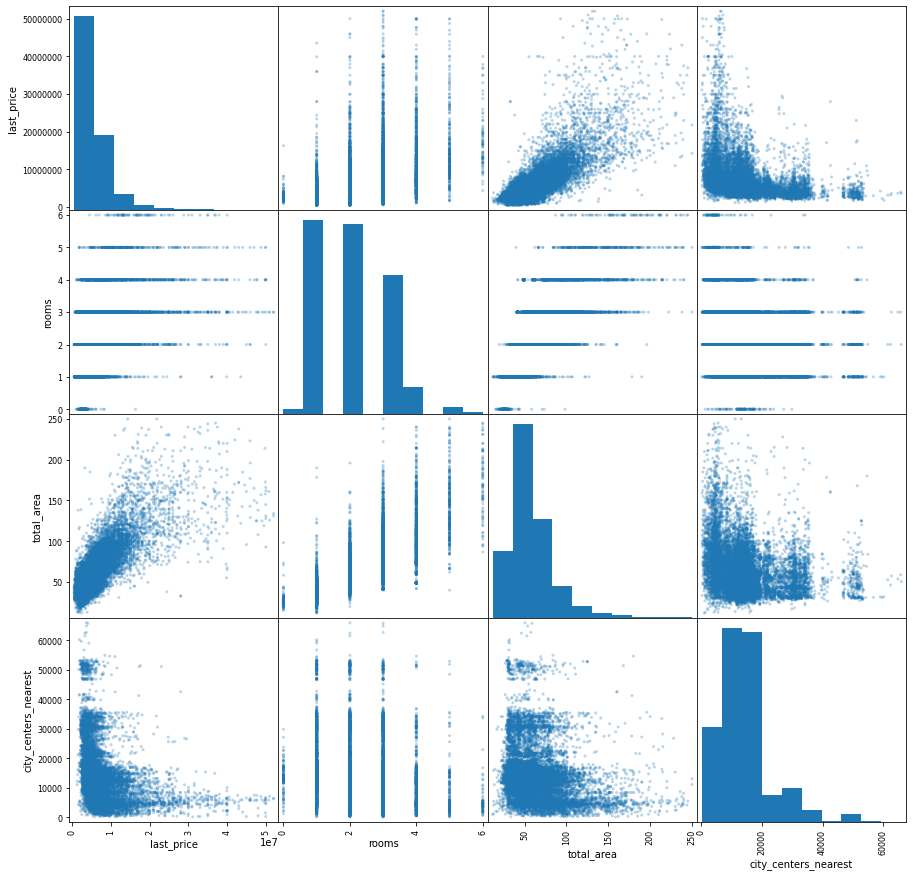

In [54]:
#проверим зависимость цены от площади,числа комнат, удалённости от центра
corr_price_aria_center = df_clean[['last_price', 'rooms', 'total_area', 'city_centers_nearest']]
display(corr_price_aria_center.corr())
pd.plotting.scatter_matrix(corr_price_aria_center, alpha=0.3, figsize=(15, 15));

По полученным даннм очевидно следующее:
1. Цена сильно зависит от площади. Коэффициент корреляции 0.77. Цена растет с увеличением площади.
2. Присутствует значимая корреляция цены с числом комнат(обусловлена корреляцией числа комнат с площадью). Коэффициент корреляции 0.47. Цена растет с увеличением числа комнат. Интересно, что максимальный диапазон цен представлен для 3 комнатных квартир. Менее 3 комнат - ограничена максимальная цена, более - минимальная.
3. Присутствует корреляция с расстояние до центра. Коэффициент корреляции -0.33. Обратная зависимость. С увеличением расстояния до центра цена падает. На расстоянии до 20 км максимальный диапазон цен. С увеличением расстояния максимальная цена предложений становиться меньше.

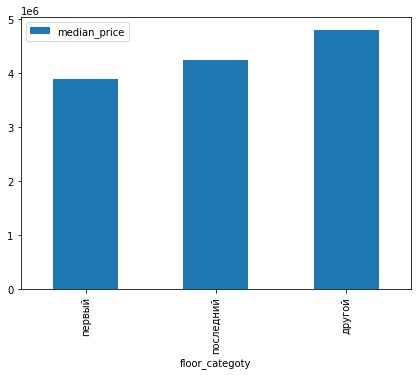

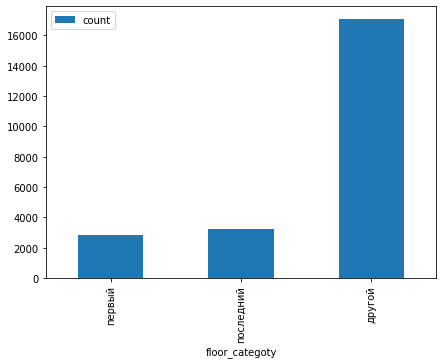

In [186]:
#проверим зависимость цены от расположения этажа
price_by_floor_categoty = df_clean[['last_price', 'floor_categoty']]
price_by_floor_categoty = price_by_floor_categoty.pivot_table(index='floor_categoty', values='last_price', aggfunc=['median', 'count'])
price_by_floor_categoty.columns = ['median_price', 'count']
for column in price_by_floor_categoty.columns:
    price_by_floor_categoty.sort_values(by=column).plot(y=column, kind='bar', figsize=(7, 5))
    plt.show()

В категории "другой" объекты дороже и предложений по ним больше. Самая низкая цена у объектов на первых этажах, по ним же меньше всего предложений. По последнму этажу объявлений тоже немного, но цены несколько выше. 

Диаграммы зависимости цены от day_of_week_exposition.
Диаграммы зависимости median_price


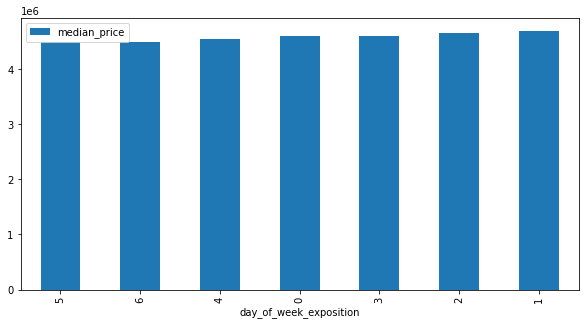

Диаграммы зависимости count


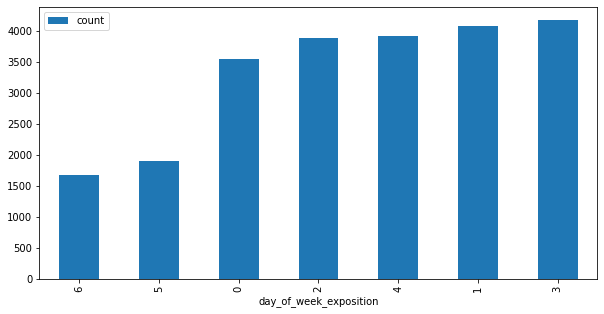


Диаграммы зависимости цены от month_exposition.
Диаграммы зависимости median_price


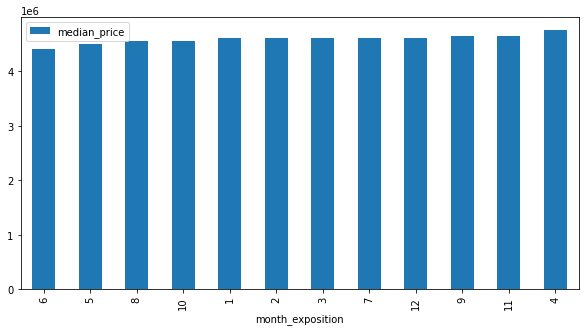

Диаграммы зависимости count


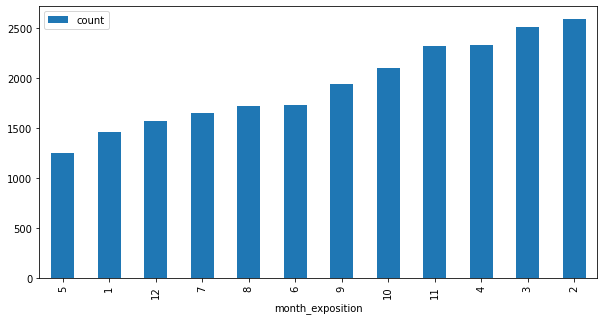


Диаграммы зависимости цены от year_exposition.
Диаграммы зависимости median_price


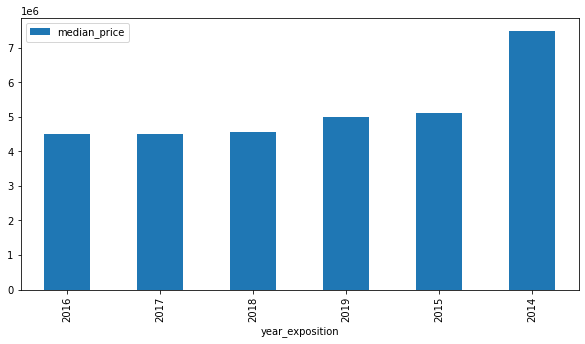

Диаграммы зависимости count


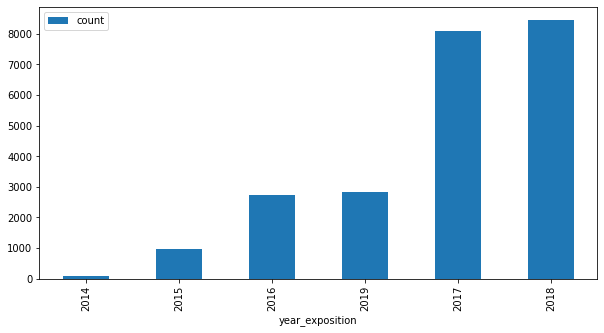

In [187]:
#проверим зависимость цены от даты размещения: дня недели, месяца и года
date_columns = ['day_of_week_exposition', 'month_exposition', 'year_exposition']

for column in date_columns:
    price_to_date = df_clean[['last_price', column]]
    price_to_date = price_to_date.pivot_table(index=column, values='last_price', aggfunc=['median', 'count'])
    price_to_date.columns = ['median_price', 'count']
    print(f'Диаграммы зависимости цены от {column}.')
    for price_to_date_column in price_to_date.columns:
        print(f'Диаграммы зависимости {price_to_date_column}')
        price_to_date.sort_values(by=price_to_date_column).plot(y=price_to_date_column, kind='bar', figsize=(10, 5))
        plt.show()
    print()


По графикам можем отметить следующее:
* В выходные медиальные значения цен немного ниже. Количество объявлений в выходные значительно меньше.
* В январе, декабре и мае предложений меньше всего. Самая низкая медиальная цена в июне. Самая высокая - в апреле.
* Данных по 2014 году мало. 2015 больше. Самое большое количество объявлений за 2017 и 2018 годы. При этом в 2014 году самая высокая медиальная цена. По 2014 статистика может быть неверной, из-за очень маленького количества объявлений, очевидно, остались дорогие квартиры, которые сложно продать. Аналогично - 2015. С 2016 по 2019 год медиальная цена плавно росла.

**Выберем 10 населённых пунктов с наибольшим числом объявлений.** 

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [188]:
#отсортируем населенные пункты по числу объявлений
pivot_locality_name = df_clean.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False)
pivot_locality_name.columns = ['count']
with pd.option_context('display.max_rows', None):
    display(pivot_locality_name)

,count
locality_name,
Санкт-Петербург,15271
посёлок Мурино,515
посёлок Шушары,436
Всеволожск,394
Пушкин,360
Колпино,335
посёлок Парголово,325
Гатчина,306
деревня Кудрово,294


In [189]:
#найдем 10 населенных пунктов с максимальным числом объявлений
pivot_locality_name = pivot_locality_name[:10]
pivot_locality_name

,count
locality_name,
Санкт-Петербург,15271
посёлок Мурино,515
посёлок Шушары,436
Всеволожск,394
Пушкин,360
Колпино,335
посёлок Парголово,325
Гатчина,306
деревня Кудрово,294


In [190]:
#выделим из таблицы объявления в этих населённых пунктах
df_pop_locality = df_clean.query('locality_name in @pivot_locality_name.index')

#посчитаем среднюю цену квадратного метра в этих населённых пунктах
df_pop_locality_sq_price = df_pop_locality.pivot_table(index='locality_name', values='price_to_msq', aggfunc='mean').sort_values(by='price_to_msq', ascending=False)

#посмотрим результат
df_pop_locality_sq_price

,price_to_msq
locality_name,
Санкт-Петербург,112223.987906
Пушкин,103234.346833
деревня Кудрово,92421.528673
посёлок Парголово,90259.743108
посёлок Мурино,85841.087495
посёлок Шушары,78615.807615
Колпино,75279.711612
Гатчина,68757.678399
Всеволожск,68699.984239


Самые высокие цены в Санкт-Петербурге и Пушкине, самые низкие во Всеволжске и Выборге.

**Определим область, входящую в центр Санкт-Петербурга.**

In [191]:
#выделим объявления только по СПБ
df_spb = df_pop_locality.query('locality_name == "Санкт-Петербург"')

#создадим столбец с расстоянием до центра в км
pd.set_option('chained_assignment', None)
df_spb.loc[:, 'to_spb_centers_km'] = np.uint16(df_spb.loc[:, 'city_centers_nearest'] / 1000)

In [60]:
#расчет цены кв.м на км от центра
mean_price_to_km = df_spb.groupby('to_spb_centers_km')['price_to_msq'].mean()
mean_price_to_km

to_spb_centers_km
0     152952.458779
1     142075.833821
2     129241.985235
3     121387.757653
4     134801.960768
5     139343.408245
6     143235.588517
7     133396.269460
8     119453.297046
9     110345.956888
10    110726.146764
11    106582.732089
12    108370.763265
13    107247.864094
14    104969.451455
15    102006.788365
16    100145.941452
17     94634.620194
18     94704.618471
19     95962.918889
20    107108.468916
21     91557.083557
22     88797.891449
23     92720.642000
24     82440.344091
25     91136.018667
26     75171.913333
27    132115.710000
28     81840.638000
29     62482.403333
Name: price_to_msq, dtype: float64

Цена падает по мере удаления от центра, но выбиваются значения на 20 и 27 км. Посмотрим, с чем это может быть связано.

In [61]:
df_spb.query('(to_spb_centers_km == 20) | (to_spb_centers_km == 27)')

,total_images,last_price,total_area,price_to_msq,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,to_spb_centers_km
397,15,5990000,54.0,110925.93,2018-03-22,3,3,2018,2,NaN,...,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,0.40,0.35,20
533,15,5900000,67.4,87537.09,2019-01-11,4,1,2019,3,2.50,...,47531.0,20410.0,0.0,NaN,0.0,NaN,95.0,0.72,0.09,20
673,5,4789500,46.5,103000.00,2019-03-19,1,3,2019,1,3.00,...,44870.0,20802.0,0.0,NaN,0.0,NaN,34.0,NaN,0.24,20
748,13,14350000,74.0,193918.92,2017-11-28,1,11,2017,2,3.13,...,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,0.41,0.34,27
871,14,7777777,75.0,103703.69,2017-11-16,3,11,2017,2,NaN,...,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,0.54,0.16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22134,7,8353000,77.0,108480.52,2017-10-09,0,10,2017,4,NaN,...,44870.0,20802.0,0.0,NaN,0.0,NaN,130.0,0.52,0.39,20
22332,6,5830583,52.2,111696.99,2018-12-30,6,12,2018,1,3.00,...,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0,NaN,0.23,20
22586,6,7753921,63.6,121917.00,2018-07-24,1,7,2018,1,3.00,...,46015.0,20802.0,0.0,NaN,1.0,792.0,NaN,NaN,0.19,20
22946,14,7690000,75.0,102533.33,2018-03-27,1,3,2018,2,NaN,...,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,0.53,0.20,20


На 27ом км всего одно предложение, его цена 14 млн. Его можно считать выбросом. Удалим.

На 20 км. много предложений, часть из них имеет высокую цену за кв.м (100, 150, 190 тыс). Возможно там находится элитный жилой комплекс.

Построим график, чтобы увидеть как меняется цена с увеличением расстояния.

<AxesSubplot:xlabel='to_spb_centers_km'>

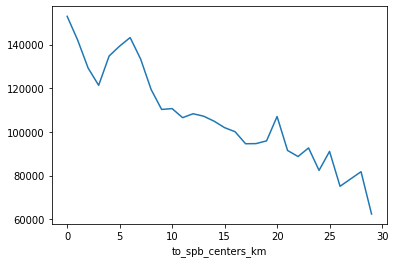

In [62]:
mean_price_to_km = mean_price_to_km.drop(27, axis=0)
mean_price_to_km.plot()

Самое резкое падение после 27 км, т.е. далеко за КАД, для определения центра такая величина не подходит.

Первый излом находится на уровне 3 км, потом цена приподнимается. Следующее резкое падение уже на 9-10 км. 

Будем считать центром расстояние от 0 до 8 км.

Чтобы перепроверить себя построим аналогичный график с общей ценой за объект, а не за кв. м.

<AxesSubplot:xlabel='to_spb_centers_km'>

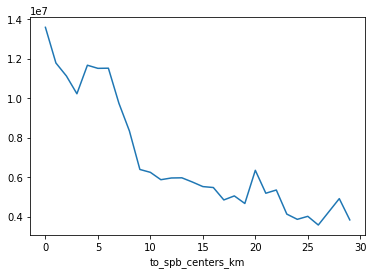

In [63]:
df_spb.groupby('to_spb_centers_km')['last_price'].mean().drop(27, axis=0).plot()

Более отчетлево виден излом на расстоянии 9-11 км от центра. Будем считать верным вывод о 0-8 км.

**Выделим сегмент квартир в центре.**

Проанализируем эту территорию и изучиим следующие параметры: площадь, цена, число комнат, высота потолков. 

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Сделаеме выводы относительно отличий в сравнении со всей базой.

In [64]:
#таблица с предложениями в центре СПБ
df_spb_center = df_spb.query('to_spb_centers_km <= 8')

Гистограмма распределения значений total_area:


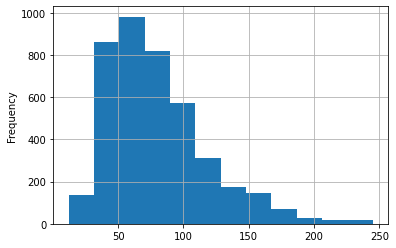

Описание данных столбца total_area:
count    4135.000000
mean       79.915011
std        37.787806
min        12.000000
25%        51.900000
50%        72.000000
75%        98.000000
max       245.000000
Name: total_area, dtype: float64


Гистограмма распределения значений last_price:


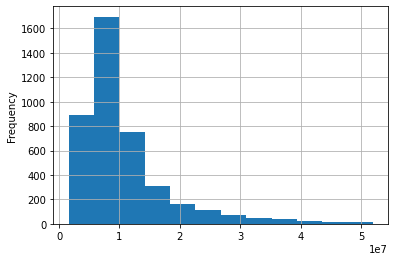

Описание данных столбца last_price:
count    4.135000e+03
mean     1.077676e+07
std      7.658804e+06
min      1.600000e+06
25%      6.010842e+06
50%      8.490000e+06
75%      1.250000e+07
max      5.200000e+07
Name: last_price, dtype: float64


Гистограмма распределения значений rooms:


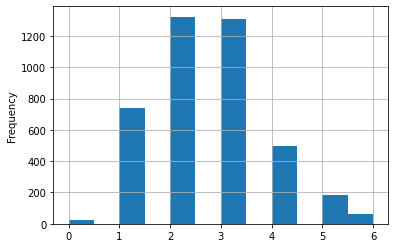

Описание данных столбца rooms:
count    4135.000000
mean        2.563966
std         1.153320
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


Гистограмма распределения значений ceiling_height:


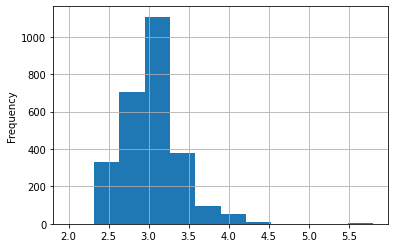

Описание данных столбца ceiling_height:
count    2683.000000
mean        3.021431
std         0.351471
min         2.000000
25%         2.765000
50%         3.000000
75%         3.200000
max         5.800000
Name: ceiling_height, dtype: float64




In [65]:
#построим гистограммы и выведем описания данных циклом
gist_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in gist_columns:
    print(f'Гистограмма распределения значений {column}:')
    df_spb_center[column].plot(bins=12, kind='hist', label='column', grid=True, range=(df_spb_center[column].min(), df_spb_center[column].max()))
    plt.show() 
    print(f'Описание данных столбца {column}:')
    print(df_spb_center[column].describe())
    print()
    print()

Гистограмма распределения значений total_area:


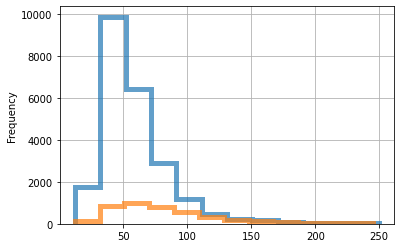



Гистограмма распределения значений last_price:


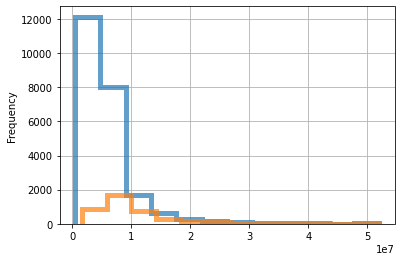



Гистограмма распределения значений rooms:


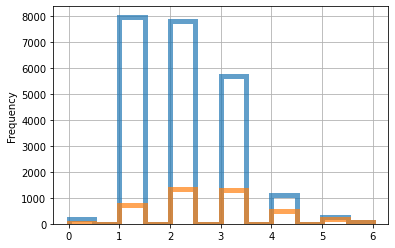



Гистограмма распределения значений ceiling_height:


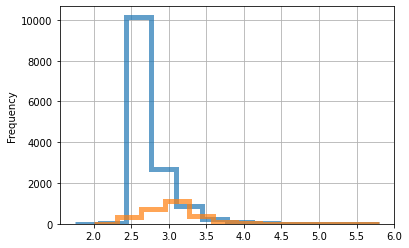

In [66]:
#Выполним наложения графиков
for column in gist_columns:
    print(f'Гистограмма распределения значений {column}:')
    df_clean[column].plot(bins=12, kind='hist', histtype='step', alpha=0.7, linewidth=5, label='column', grid=True, range=(df_clean[column].min(), df_clean[column].max()))
    df_spb_center[column].plot(bins=12, kind='hist', histtype='step', alpha=0.7, linewidth=5, label='column', grid=True, range=(df_spb_center[column].min(), df_spb_center[column].max()))
    plt.show() 
    print()
    print()

1. `total_area` - Гистограмма распределения значений площади в сравнении с распределением по всей базе (с учетом отброшенных выбивающихся значений) имеет несколько иной вид. Средняя площадь почти 80 кв. м, предложений от 50 до 100 кв.м. значительно больше относительно выборки.
2. `last_price` - Гистограмма распределения значений цен в сравнении с распределением по всей базе (с учетом отброшенных выбивающихся значений) также имеет иной вид. Средняя цена выше (10 против 6,5 млн), количество предложений за 10-14 млн. больше относительно всей выборки.
3. `rooms` - Гистограмма распределения количества комнат в сравнении с распределением по всей базе (с учетом отброшенных выбивающихся значений) изменилась не так сильно. Относительно всей выборки меньше предложений по однокомнатным кваритарам, больше по 2-3 комнатным.
4. `ceiling_height` - Высота потолков в квартирах в центре в среднем выше. Медиальное значение - 3 м против 2.65.

Выделим факторы, которые влияют на стоимость квартиры.

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.723028,0.431874,-0.118621
total_area,0.723028,1.000000,0.788939,-0.198346
rooms,0.431874,0.788939,1.000000,-0.225433
city_centers_nearest,-0.118621,-0.198346,-0.225433,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

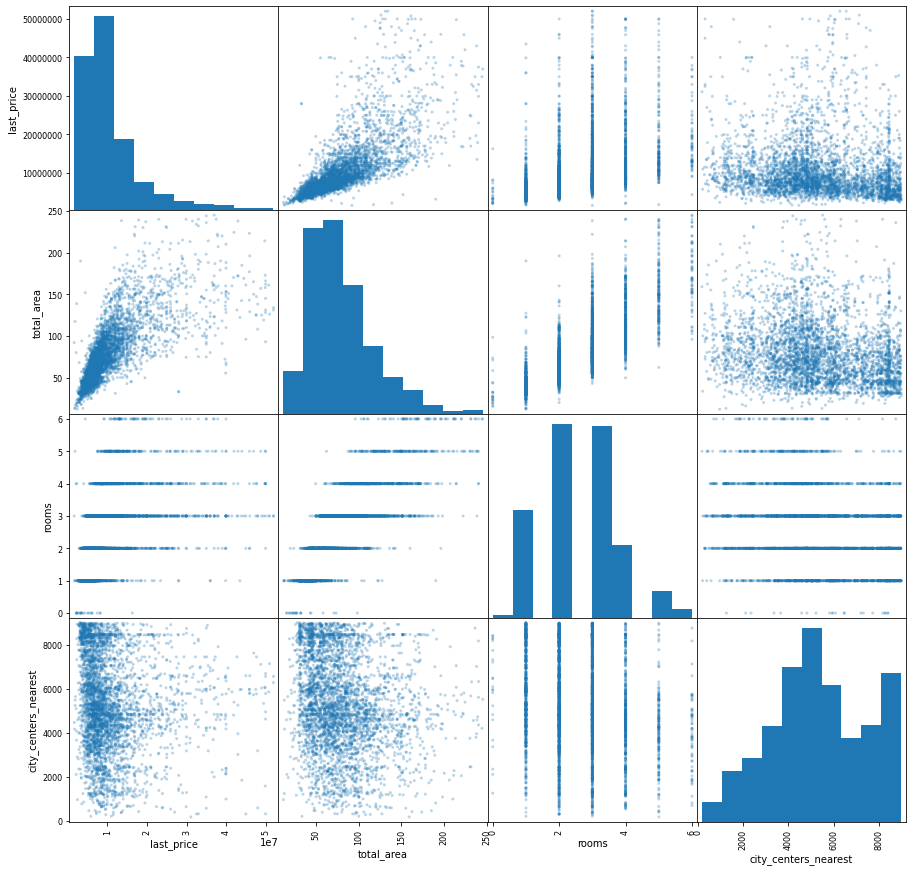

In [67]:
#проверим зависимость цены квартир в центре СПБ от площади, числа комнат, удалённости от центра
corr_spb_center = df_spb_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
display(corr_spb_center.corr())
pd.plotting.scatter_matrix(corr_spb_center, alpha=0.3, figsize=(15, 15))

По данным очевидно, что:
1. Цена недвижимости в центре прямопропрциональна площади. Коэффициент корреляции 0.72, чуть ниже, чем для общей базы.
2. Минимальная цена растет с увеличением количества комнат. Самый большой диапазон ценовых предложений для 3-комнатных квартир. Коэффициент корреляции 0.43, чуть ниже, чем для общей базы.
3. Корреляция с удаленностью от центра в пределах 8 км слабо выражена. Коэффициент корреляции -0.12. Для базы в целом -0.33.

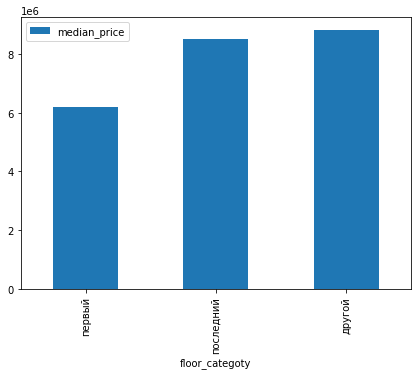

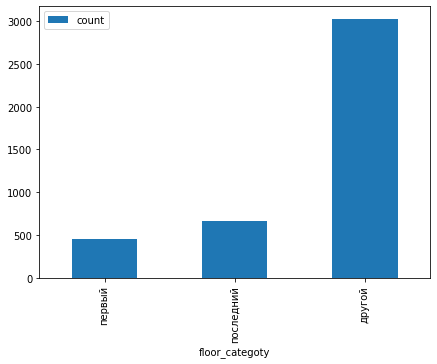

In [68]:
#проверим зависимость цены от расположения этажа
spb_price_by_floor_categoty = df_spb_center[['last_price', 'floor_categoty']]
spb_price_by_floor_categoty = spb_price_by_floor_categoty.pivot_table(index='floor_categoty', values='last_price', aggfunc=['median', 'count'])
spb_price_by_floor_categoty.columns = ['median_price', 'count']
for column in spb_price_by_floor_categoty.columns:
    spb_price_by_floor_categoty.sort_values(by=column).plot(y=column, kind='bar', figsize=(7, 5))
    plt.show()

Ситуация похожа на выборку из общей базы. 

В категории "другой" самое большое число предложений и самые высокие цены. 

На первых - меньше предложений и ниже всего цена. 

Значимое отличие - на последних этажах в центре цена в среднем значительно выше, чем по общей базе и почти такая же как на "других". Значительно увеличился отрыв от "первых" этажей - более чем на 2 млн.

Средняя цена выросла во всех категориях. 

Диаграммы зависимости цены от day_of_week_exposition.
Диаграммы зависимости median_price


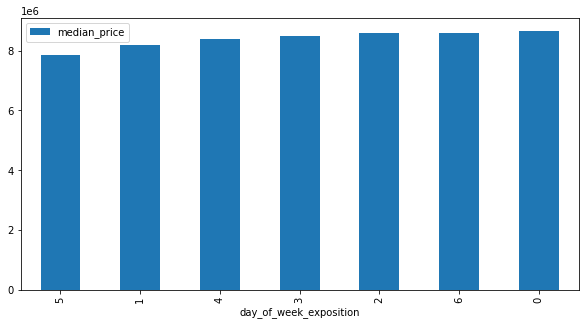

Диаграммы зависимости count


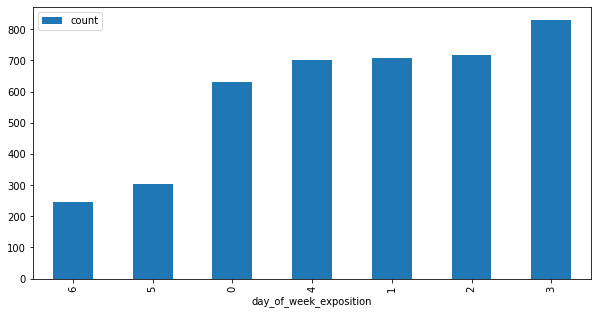


Диаграммы зависимости цены от month_exposition.
Диаграммы зависимости median_price


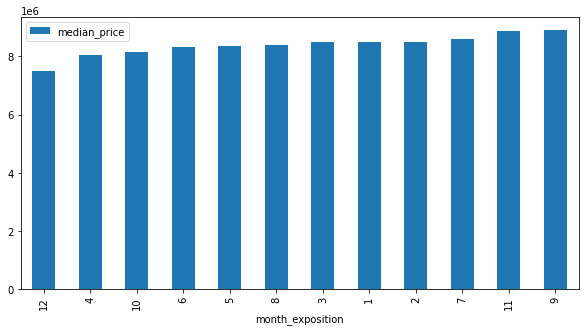

Диаграммы зависимости count


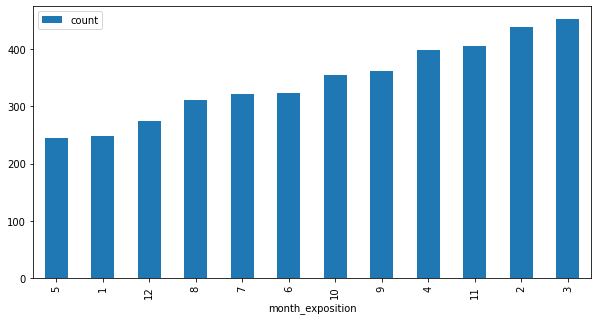


Диаграммы зависимости цены от year_exposition.
Диаграммы зависимости median_price


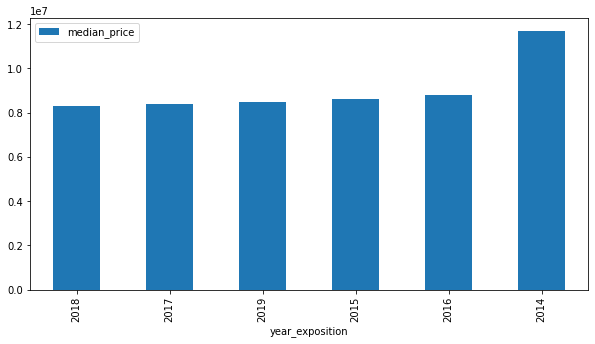

Диаграммы зависимости count


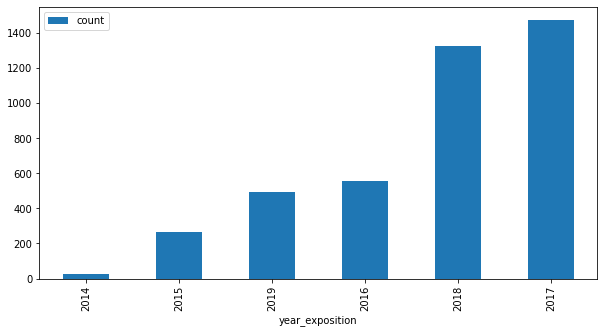

In [69]:
#проверим зависимость цены от даты размещения: дня недели, месяца и года

for column in date_columns:
    spb_price_to_date = df_spb_center[['last_price', column]]
    spb_price_to_date = spb_price_to_date.pivot_table(index=column, values='last_price', aggfunc=['median', 'count'])
    spb_price_to_date.columns = ['median_price', 'count']
    print(f'Диаграммы зависимости цены от {column}.')
    for spb_price_to_date_column in spb_price_to_date.columns:
        print(f'Диаграммы зависимости {spb_price_to_date_column}')
        spb_price_to_date.sort_values(by=spb_price_to_date_column).plot(y=spb_price_to_date_column, kind='bar', figsize=(10, 5))
        plt.show()
    print()

Аналогично анализу по общей базе отметим следующее:
* В субботу медиальное значение цены ниже всего. В понедельник ставят самые высокие цены. Количество объявлений в выходные значительно меньше. 
* В декабре предложений по высоким ценам меньше всего. В сентябре - больше. Меньше всего объявлений в мае. Больше - в марте.
* Данных по 2014 году тоже мало. Самое большое количество объявлений за 2017 и 2018 годы. Без учета объявлений по 2014 году (нерелевантная выборка), цены в центре практически не меняются.

## Общий вывод

Мы проанализировали общую выборку по Ленинградской области и отдельно данные предложений в центре Санкт-Петербурга. На основе полученных данных можем заключить, что на цену недвижимости влияют следующие параметры:
1. Площадь. Для обеих областей цена расет пропроционально общей площади с коэффициентом корреляции выше 0.72.
2. Количество комнат. С увелицением числа комнат минимальная цена растет, однака самый широкий дивпазон цен у 3-комнатных квартир.
3. Этаж. Квартиры на первом этаже дешевле по минимальному и максимальному порогу. На последнем этаже верхняя планка цен несколько выше. Самый большой диапазон цен и самая высокая медиальная цена у объектов на средних этажах.
4. Удаленность от центра. Для выботки в 8 км от центра СПБ медиалная цена выше на 3.5 млн, чем для общей выборки. Однако в самом центре города данная зависимость намного менее выражена.
5. Года публикации - для базы в целом с 2016 и 2019 цена медленно растет. Для центра такой зависимости не наблюдается, цена колеблится незначительно. Рассматривать 2014-2015 годы в целом не стоит, т.к. объявлений по ним мало и информация могла устареть. Возможно, правильно было бы удалить их из выборки.

Также можем отметить, что:
* В центре города потолки в среднем выше, площадь и количество комнат больше, что тоже может влиять на стоимость.
* В разных районал Ленинградской области цены сильно отличаются. Так самая дорогая недвижимость по цене за кв.м в СПБ и Пушкине. Во Всеволжске и Выборге одни из самых низких цен.
* В среднем квартира продается от 45 до 232 дней.
* По какой-то прицине по субботам люди не продают дорогие квартиры или занижают цены.